# Introduction

Today's dataset comes from the UCI Machine Learning Repository and is a set of data on [Online News Popularity](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) for articles shared on Mashable.

The dataset can be found in this repository (`datasets/OnlineNewsPopularity.csv`) and the codebook can be found within the `datasets` folder as well (or online [here](https://git.generalassemb.ly/DSI-EAST-1/lab-feature-selection-grid-search/blob/master/datasets/OnlineNewsPopularity.names).) However, you will not need to have intimate domain knowledge to create a great model!

## Question 1: EDA

For this step, do the following:
- Import the data in `datasets/OnlineNewsPopularity.csv`
- Use methods like `.describe()` and `.info()` to identify if there is any missing data and any non-numeric data
- Print out the results of `df.columns` -- are these names formatted correctly?
- Drop any columns that do not contain numeric values
- Drop or impute any missing data
- Recode the `shares` column (your target) to be 1 if shares is >= 1500 and 0 otherwise

In [1]:
'''Importing the needed Libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

In [2]:
online_news_pop = pd.read_csv('datasets/OnlineNewsPopularity.csv')

In [3]:
online_news_pop.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
'''Printing out the column names'''
online_news_pop.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
'''Printing out the shape of the dataframe'''
online_news_pop.shape

(39644, 61)

In [6]:
'''Performing basic EDA'''
online_news_pop.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [7]:
'''Peforming basic EDA with info'''
online_news_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

## Question 2: Correlation Table

Use Seaborn and pandas to create a correlation heatmap. What patterns are apparent to you? Is this easy to use or too cluttered to make sense of?

In [8]:
online_news_pop.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [9]:
online_news_pop_input = online_news_pop.copy()

In [10]:
'''Droping the URL and the Shares Columns from the Dataset'''
online_news_pop_input.drop(['url', ' shares'], axis = 1, inplace=True)

In [11]:
'''Validating the columns'''
online_news_pop_input.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

In [12]:
'''Building out the correlation'''
online_news_pop_input_corr = online_news_pop_input.corr()
online_news_pop_input_corr

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.126344,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.004671,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,0.188236,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,0.098062,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,0.096446,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,0.097440,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231


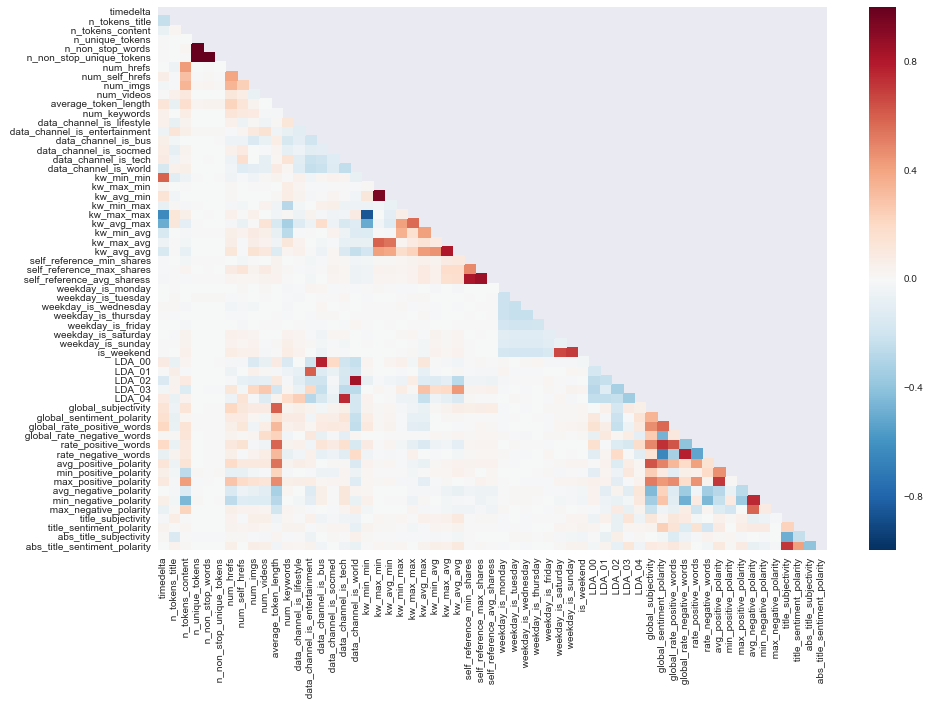

In [13]:
fig, ax = plt.subplots(figsize = (15,10))

mask = np.zeros_like(online_news_pop_input_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(online_news_pop_input_corr, mask=mask)

The heatmap is definitely cluttered as there are lots of features. I had to turn of the annotation to reduce the clutter on the heatmap 

## 3. Train-test split

Split your data frame into your target (the `shares` column) and your features (all other columns), then split those into a training and holdout (test) set. You will not use this holdout set until the end of the lab. 

Your test size should be `0.33` and should use the random seed `20170825`.

In [14]:
online_news_pop.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [15]:
'''Defining the Target Variable'''

y = online_news_pop[' shares']
y.head()

0     593
1     711
2    1500
3    1200
4     505
Name:  shares, dtype: int64

In [16]:
'''Defining the predictor Variable'''
X = online_news_pop.loc[:, ' timedelta': ' abs_title_sentiment_polarity' ]
X.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [17]:
'''Creating the Train and Test Set'''
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=20170825)

In [18]:
print ('X Train Shape: ', X_train.shape)
print ('Y Train Shape: ', y_train.shape)
print ('X Test Shape: ', X_test.shape)
print ('Y Test Shape: ', y_test.shape)

X Train Shape:  (26561, 59)
Y Train Shape:  (26561,)
X Test Shape:  (13083, 59)
Y Test Shape:  (13083,)


## 4. Feature Selection through Regularization

Use a Lasso Logistic Regression to decide on a set of features to select. 

1. Standardize your training dataset.
2. Fit three lasso logistic regressions with `C` of 0.1, 1.0, and 10.0. Double check with the documentation to ensure that you are fitting **Lasso** logistic regressions.
3. Identify which columns have zero coefficients. 
4. What trends do you see? Are there any features that seem like strong contenders to be put in the model? 
    > If there are no trends yet, no worries! We're going to try other feature selection techniques as well.

In [19]:
'''Standardizing the input set'''
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)

In [20]:
# lasso = LogisticRegression(penalty='l1', C = 0.1)
# lasso_fit_01 = lasso.fit(X_train_ss, y_train)

In [21]:
# lasso = LogisticRegression(penalty='l1', C = 1)
# lasso_fit_1 = lasso.fit(X_train_ss, y_train)

In [22]:
# lasso = LogisticRegression(penalty='l1', C = 10)
# lasso_fit_10 = lasso.fit(X_train_ss, y_train)

In [23]:
# '''Printing the Coefficients from Lasso 0.1'''
# lasso_fit_01.coef_

In [24]:
#'''Printing the Coefficients from Lasso 1'''
# lasso_fit_1.coef_

In [25]:
# '''Printing the Coefficients from Lasso 2'''
# lasso_fit_2.coef_

In [26]:
# for key, value in enumerate(X.columns): 
#     print (value, lasso_fit.coef_[key])

## 5. Feature Selection with RFE

Use Recursive Feature Elimination and a new Logistic Regression object to do feature selection.

1. Instantiate an `RFE` object, set to cut down your input features to 50% of the input, as well as a `LogisticRegression` object.
2. Fit your `RFE` object to your standardized features in your training set. 
3. What features does RFE suggest to drop? Are there any similarities to those features dropped by regularization?
    > Remember that after fitting, `RFE.support_` gives you a mask of columns, where columns marked `True` are going to be kept and columns marked `False` should be dropped.

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, verbose=2)
rfe.fit(X_train_ss, y_train)

Fitting estimator with 59 features.


## 6. Feature Selection with SelectKBest

Use SelectKBest and `f_classif` to select the top 30 features

1. Instantiate a SelectKBest, using a `score_func` of `f_classif` and a `k` of 30
    > Note, `f_classif` needs to be imported as well! 
2. Fit SelectKBest to your standardized features in the training set.
3. Print out which columns are dropped in this case.
4. Pick a set of columns (such as `LDA`, `polarity`, `weekday`, or `data_channel` -- are any columns that have been consistently dropped? 
    > Remember that after fitting, `SelectKBest.get_support()` gives you a mask of columns, where columns marked `True` are going to be kept and columns marked `False` should be dropped.

## 7. Choosing a Feature Set

1. Choose a set of features to keep:
     - Features with non-zero coefficients from regularization
     - Features kept by RFE
     - Features kept by SelectKBest
2. Create a new version of your training and holdout features. Drop the columns you will not be keeping from these new versions of your training and holdout features. **Do not overwrite your original training and holdout features** -- we will use those shortly.  Print out the shapes to ensure that you have successfully dropped those columns. 
    > Remember that both `RFE` and `SelectKBest` give you a mask of columns to keep and that those columns are in the same order in both your training and holdout sets!
3. Create a correlation heatmap with your reduced feature set. Do you see any patterns? What type of features seem important? Do they relate to each other?

## 8. Hyperparameter Optimization with GridSearch

Fit three logistic regressions on your training set, with the following parameters:

1. A logistic regression with the default hyperparameters, with all features.
2. A logistic regression with the default hyperparameters, with only the features you selected in question 7.
3. A logistic regression using `GridSearchCV` to optimize the following hyperparameters, with only the features you selected in question 7. Print out the hyperparameters selected by `GridSearchCV`
  - `penalty`: should we use l1 or l2 regularization?
  - `C`: how strong should our regularization be?
4. Score each of your fit models against the holdout set. Which model does the best?
5. Print out a confusion matrix for each model. Are there any trends that you see?

## 9. _Bonus_ Continue Optimizing!

In this lab, you're not expected to complete all (or even any) of question 9. However, if you find yourself with extra time, any of these options may lead to a higher score. Modeling is complex and often has a *number* of pathways to go down. This is a small selection  of potential next steps for this dataset.

We have only scratched the surface of how to optimize a model for this dataset. With your remaining time, feel free to optimize in one of a few different ways, making sure that you are using cross-validation to check that your decisions are sound:

1. **Feature Selection**: try a model with a new set of features from the following methods:
    - A higher regularization strength for feature selection via regularization
    - A lower / higher number of features returned by `RFE` or `SelectKBest`
2. **Feature Engineering**: try a model with the following tweaks:
    - Are all the features modeled correctly? Should we create dummy variables or otherwise transform any of the current features?
    - We discarded the `url` feature very early onwards -- is there useful information we could extract from there?
    - Is our decision to predict over/under 1500 shares correct? Do EDA on the original `shares` column to identify if there is a better cutoff.
3. **Model Selection**: 
    - Try a different classification model such as _k_-Nearest Neighbors
    - Is classification even a correct choice here? Could we use a regression model to predict the actual number of shares instead?
4. **Hyperparameter Optimization**: 
    - Continue doing hyperparameter optimization through `GridSearchCV`
    - **Double Bonus**: [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) performs the same parametric search that `GridSearchCV` does, but over a random distribution of hyperparameters (versus user-selected ones). This can be a helpful way to start zeroing in on an area where you may want to try some more targeted grid searching
    - **Triple Bonus**: `GridSearchCV` automatically scores and ranks results based on the default scoring method in each model type ($R^2$ for `LinearRegression`, mean accuracy for `KNeighborsClassifier`, etc.) We can direct `GridSearchCV` to prioritize different metrics, however, such as precision or recall for class 1 or class 0, for example. Do some independent research on the [scoring parameter in sklearn](http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) and try to implement it yourself. Pick two or three metrics and optimize for each. Are the hyperparameters chosen different across each case?
    > **Note**: this is pretty advanced. Try this only if you're _exceptionally_ comfortable with the material this week.